In [12]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
class Generator(nn.Module):
    def __init__(self, channels_noise, channels_img, features_g):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            # Input: N x channels_noise | 1 x 1 x 100
            self._block(100, features_g * 36, 4, 1, 0),  # img: 4x4x864
            self._block(features_g * 36, features_g * 18, 4, 2, 1),  # img: 8x8x432
            self._block(features_g * 18, features_g * 9, 4, 2, 1),  # img: 16x16x216
            self._block(features_g * 9, features_g * 3, 5, 1, 0),  # img: 20x20x72
            nn.ConvTranspose2d(
                features_g * 3, channels_img, kernel_size=5, stride=1, padding=0
            ),
            # Output: N x channels_img | 24x24x4
            nn.Tanh(),
        )

    def _block(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(
            nn.ConvTranspose2d(
                in_channels,
                out_channels,
                kernel_size,
                stride,
                padding,
                bias=False,
            ),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )

    def forward(self, x):
        return self.gen(x)

In [7]:
gen = Generator(100, 4, 24).to(device)
gen.load_state_dict(torch.load("ganPunk.pth", map_location=device))

<All keys matched successfully>

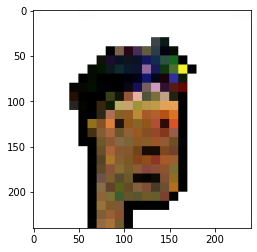

In [25]:
noise = torch.randn(1, 100, 1, 1)
img = gen(noise).detach().cpu().numpy()[0]
img = np.moveaxis(img, 0, -1)
img = (img - img.min()) / (img.max() - img.min())

img = img * 255
img = img.astype(np.uint8)
im = Image.fromarray(img)
im = im.resize((240, 240), resample=Image.NEAREST)
plt.imshow(im)